## Antony Owino. Final Paper. 13<sup>th</sup> Dec 2017. Notebook 4.

#### NB: Assumes the [first notebook (*Analysis of Viewers Searching for Music Heard On Contemporary TV.ipynb* )](Analysis of Viewers Searching for Music Heard On Contemporary TV.ipynb) has been run to generate required files.

This notebook analyzes the sentiment of questions and comments posted by viewers to determine positive or negative emotions using 2 methods.

  1. Using a predefined list of [positive](http://www.unc.edu/~ncaren/haphazard/positive.txt) and [negative](http://www.unc.edu/~ncaren/haphazard/negative.txt) terms against the dataset
  2. using `TextBlob` which employs subjectivity and polarity of text in determining sentiments.

### Creates a dataset from all the TV show questions and sorting the resultant dataset by date the question was created.

In [1]:
import glob, os
import pandas as pd
from pprint import pprint

current_working_dir = os.getcwd()
all_shows_questions_file_chronologically = "all_shows_questions_only.csv" # name of the file with all the questions
path_to_all_shows_questions_file = os.path.join(current_working_dir, all_shows_questions_file_chronologically)

all_questions_files = glob.glob(os.path.join(current_working_dir, "*/*_questions_only.csv"), recursive=False)
concatenated_df = pd.concat((pd.read_csv(f) for f in all_questions_files))

body_df = concatenated_df.sort_values(['date_created'], ascending=[1]) # sort by date_created column
all_shows_questions_file = os.path.join(current_working_dir, "all_shows_questions_only.csv")
body_df.to_csv(all_shows_questions_file, index=False)

#### Create a Python list with all the questions

Remove any duplicate items from the list

In [2]:
import csv, os, errno, shutil
from itertools import groupby
from operator import itemgetter
import pandas as pd
from pprint import pprint

current_working_dir = os.getcwd()

all_shows_questions_file = os.path.join(current_working_dir, "all_shows_questions_only.csv")
raw_shows_questions_list = []
with open(all_shows_questions_file, 'r') as file: # This makes sure that file is closed after reading
    data = csv.reader(file)
    next(data) #  skip the header row
    for row in data:
        raw_shows_questions_list.append((row[0],row[1])) # This puts all the data into a list
    file.close() 
    
# remove duplicates by creating a new list that check for any similar existing question
shows_questions_list = []
for i in raw_shows_questions_list:
    if i[1] not in shows_questions_list:
        shows_questions_list.append(i[1])

print("Duplicates removed:", len(shows_questions_list), "items")
print("With duplicates:", len(raw_shows_questions_list), "items")

Duplicates removed: 4206 items
With duplicates: 4288 items


### Three files that need to be in the notebook directory for the first strategy of analysing sentiment:
  * positive.txt
  * negative.txt
  * all_shows_questions_only.csv

Load the postive and negative words as Python lists

In [3]:
import re

def get_file_content_as_list(file_name):
    with open(file_name, 'r') as file_name_handle:
        return file_name_handle.read().splitlines()
    
positive_words = get_file_content_as_list('positive.txt')
negative_words = get_file_content_as_list('negative.txt')

def tokenizer(txt_2_token): # Function for tokenizing
    the_tokens = re.findall(r'\b\w[\w-]*\b', txt_2_token.lower())
    return the_tokens
    

text_tokens = tokenizer(shows_questions_list[11])

print(len(positive_words), len(negative_words), len(raw_shows_questions_list))

2230 3905 4288


### Two main functions:
  * `count_sentiment_tokens(list_of_tokens, list_of_target_words)` - This function calculates how many target sentiment words feature in a question token list.
    * `list_of_tokens` - Takes in the question tokens
    * `list_of_target_words` - Is the list of positive or negative sentiments to look out for
  * `overall_sentiment(questions_corpora, words)` - This function implements `count_sentiment_tokens` function for all the questions and aggregates the positive and negative sentiments in total.
    * `questions_corpora` - Takes in the list of questions to iterate through each question and pass it on to be counted.
    * `words` - Is the list of postive or negative sentiments to look out for
    

In [4]:
def count_sentiment_tokens(list_of_tokens, list_of_target_words):
    num_target_words = 0
    matched_words = []
    for token in list_of_tokens: # Goes through the tokens in the list
        if token in list_of_target_words: # For each one it checks if it is in the target list
            num_target_words += 1
            matched_words.append(token)
    return num_target_words, matched_words # Note that we are returning a tuple (2 values)

def overall_sentiment(questions_corpora, words):
    sentiment_freq_list = []
    sentiment_freq_word_list = []
    for question in questions_corpora:
        question_token = tokenizer(question[1])
        theTuple = count_sentiment_tokens(question_token, words)
        sentiment_freq_list.append(theTuple[0])
        sentiment_freq_word_list.append(theTuple[1])
        #print(str(theTuple[0]) + " " + str(theTuple[1]))
    return sentiment_freq_list, sentiment_freq_word_list
        
# shows_questions_list - without duplicates
# raw_shows_questions_list - with duplicates
positive_summary = overall_sentiment(raw_shows_questions_list, positive_words)
negative_summary = overall_sentiment(raw_shows_questions_list, negative_words)
# We use positive_summary[0] to extract indices only from the tuple. That has the frequencies we need to plot

positive_label = "positive ({})".format(sum(positive_summary[0]))
negative_label = "negative ({})".format(sum(negative_summary[0]))
print(positive_label, negative_label)

positive (2005) negative (1171)


### Plotting the sentiments

The two resulting lists plotted to give a visual summary, which shows a relative balance between use of both positive and negative words.

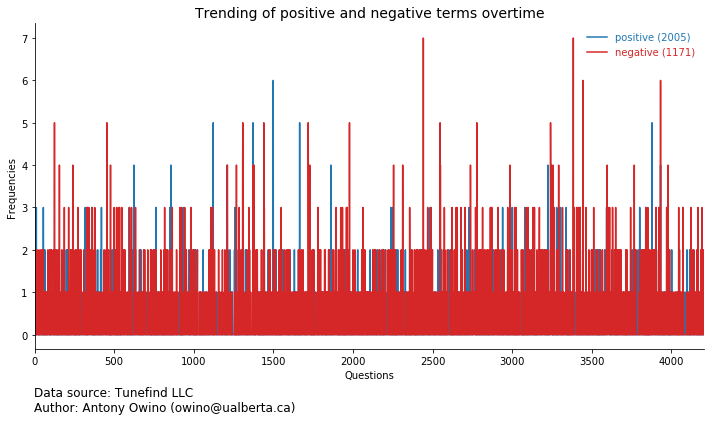

Percentage of positive questions: 46.75839552238806%
Percentage of neutral questions: 19.449626865671643%
Percentage de negative questions: 27.308768656716417%


In [5]:
import matplotlib.pyplot as plt
import nltk

plt.figure(figsize=(12, 6))

# Remove the top and right plot frame lines
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False)

tableau2 = [(31, 119, 180), (214, 39, 40)] 

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau2)):  
    r, g, b = tableau2[i]  
    tableau2[i] = (r / 255., g / 255., b / 255.)

negative, = plt.plot(negative_summary[0], label=positive_label, color=tableau2[0])
positive, = plt.plot(positive_summary[0], label=negative_label, color=tableau2[1])

plt.title('Trending of positive and negative terms overtime', fontsize=14) # Plot Title

plt.legend(handles=[positive, negative])

leg = plt.legend(framealpha = 0, loc = 'best')
for idx, text in enumerate(leg.get_texts()):
    text.set_color(tableau2[idx])

plt.xlabel('Questions') # X Axis Label
plt.ylabel('Frequencies') # Y Axis Label
plt.xlim([0,4206])

plt.text(-3, -1.8, "Data source: Tunefind LLC"  
       "\nAuthor: Antony Owino (owino@ualberta.ca)",
         fontsize=12) 

plt.show() 

# Print percentages:
questions_count = len(raw_shows_questions_list)
neutral_summary = sum(positive_summary[0]) - sum(negative_summary[0])
print("Percentage of positive questions: {}%".format(sum(positive_summary[0])*100/questions_count))
print("Percentage of neutral questions: {}%".format(neutral_summary*100/questions_count))
print("Percentage de negative questions: {}%".format(sum(negative_summary[0])*100/questions_count))

### Sentiment Analysis using TextBlob

,Questions,Length,Timestamp,Positive,Negative
0,"anyone know the band/song title last song on ""...",72,2010-02-19 04:10:26,0,0
1,It is 'Everywhere I Go' by Lissie.,34,2010-02-19 07:51:38,0,0
2,Which is the real name of the song of All Thie...,90,2010-02-20 21:29:10,1,0
3,What is the song near the end of the episode w...,263,2010-03-06 11:20:03,1,1
4,What is the name of the song played during the...,224,2010-03-14 09:11:21,1,2
5,What is the song being sung as the episode is ...,108,2010-03-26 03:07:02,0,0
6,"So, what was the song at the end of tonight's ...",133,2010-04-02 02:12:15,0,0
7,"i'm looking for a song in season 2 episode ""su...",315,2010-04-06 18:28:08,1,2
8,"does this episode even exist? if it does, it's...",65,2010-04-21 22:20:12,1,0
9,"The scene with Bailey, Alex, Lexie, and the so...",212,2010-04-30 03:24:25,2,0


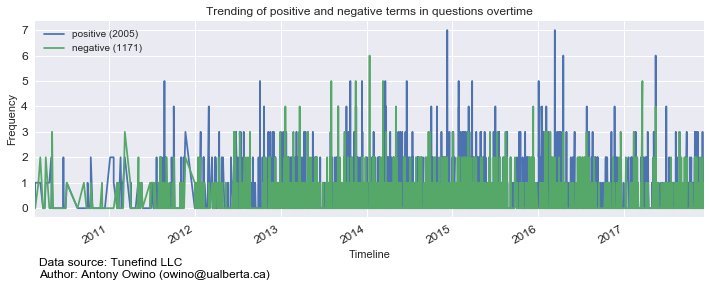

In [6]:
from textblob import TextBlob
import re
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns
%matplotlib inline

shows_questions_text = ' '.join(shows_questions_list)
questions_blob = TextBlob(shows_questions_text)
#questions_blob.tags
#questions_blob.noun_phrases

# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[question[1] for question in raw_shows_questions_list], columns=['Questions'])

# We add relevant data:
data['Length']  = np.array([len(question[1]) for question in raw_shows_questions_list])
data['Timestamp'] = np.array([pd.to_datetime(question[0],unit='s') for question in raw_shows_questions_list])
data['Positive'] = np.array([pos_freq for pos_freq in positive_summary[0]])
data['Negative'] = np.array([neg_freq for neg_freq in negative_summary[0]])

display(data.head(10))

# Create time series for data:
tlen = pd.Series(data=data['Length'].values, index=data['Timestamp'])
tpos = pd.Series(data=data['Positive'].values, index=data['Timestamp'])
tneg = pd.Series(data=data['Negative'].values, index=data['Timestamp'])

tpos.plot(figsize=(12,4), label=positive_label, legend=True, fontsize=12)
ax = tneg.plot(figsize=(12,4), label=negative_label, legend=True, title='Trending of positive and negative terms in questions overtime')

ax.set_ylabel("Frequency")
ax.set_xlabel("Timeline")

ax.text(0.006, -0.31, "Data source: Tunefind LLC"  
       "\nAuthor: Antony Owino (owino@ualberta.ca)",
        transform=ax.transAxes,
         fontsize=12,
           color='black')

#### Assessing the polarity of questions and incorporating neutral sentiment factor using TextBlob

In [7]:
from textblob import TextBlob
import re
import numpy as np
import pandas as pd
from IPython.display import display
#import seaborn as sns

shows_questions_text = ' '.join(shows_questions_list)
questions_blob = TextBlob(shows_questions_text)
#questions_blob.tags
#questions_blob.noun_phrases

# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[question[1] for question in raw_shows_questions_list], columns=['Questions'])


# https://dev.to/rodolfoferro/sentiment-analysis-on-trumpss-tweets-using-python-
def clean_question(question):
    '''
    Utility function to clean the text in a question by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", question).split())

def analyze_sentiment(question):
    '''
    Utility function to classify the polarity of a question
    using textblob.
    '''
    analysis = TextBlob(clean_question(question))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
    
# We create a column with the result of the analysis:
data['Sentiment Analysis'] = np.array([analyze_sentiment(question[1]) for question in raw_shows_questions_list])

# We display the updated dataframe with the new column:
display(data.loc[4260:4266])
display(data.loc[3260:3366])
#display(data.tail(50))

# Construct lists with classified questions:
pos_questions = [ question for index, question in enumerate(data['Questions']) if data['Sentiment Analysis'][index] > 0]
neu_questions = [ question for index, question in enumerate(data['Questions']) if data['Sentiment Analysis'][index] == 0]
neg_questions = [ question for index, question in enumerate(data['Questions']) if data['Sentiment Analysis'][index] < 0]

# Print percentages:
print("Percentage of positive questions: {}%".format(len(pos_questions)*100/len(data['Questions'])))
print("Percentage of neutral questions: {}%".format(len(neu_questions)*100/len(data['Questions'])))
print("Percentage de negative questions: {}%".format(len(neg_questions)*100/len(data['Questions'])))

,Questions,Sentiment Analysis
4260,does anyone know the music that plays when hop...,0
4261,"How can i listen to ""I see charcoal (you see s...",0
4262,Does anyone know that song where Bob is coding...,0
4263,"the persecution scene song, is just insane",-1
4264,Someone know the song or the track score name ...,0
4265,anyone knows what is playing while James tryin...,0
4266,"Bear McCreary is the composer of the song, but...",0


,Questions,Sentiment Analysis
3260,What song is playing at The Radley in the firs...,1
3261,Hello who can help me with te whold album incl...,0
3262,What's the name of the song which plays at sta...,0
3263,What's the name of the song playing after Thea...,0
3264,What's the music played when oliver and Felici...,1
3265,Hey there SPN fans. I need some help with a sn...,1
3266,"Hallo, whats the name of the song at the end w...",-1
3267,song at the end where crowley opens the van?,0
3268,!s there a song that plays during aria and Ezr...,0
3269,What's the music when Hannah and Lucas are tal...,0


Percentage of positive questions: 28.03171641791045%
Percentage of neutral questions: 58.62873134328358%
Percentage de negative questions: 13.33955223880597%


### Examining the length of questions overtime

153


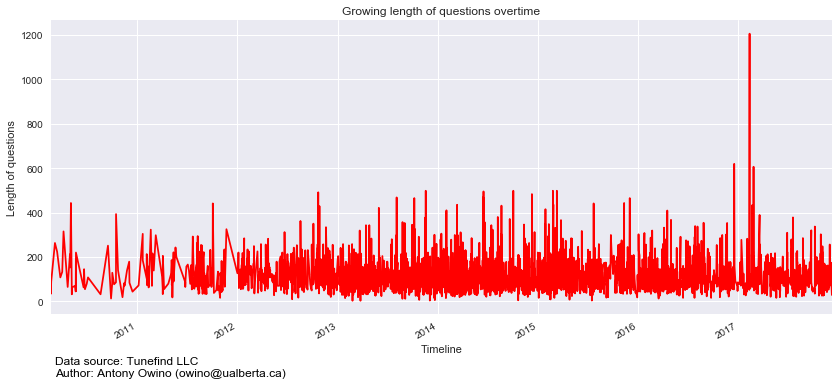

In [8]:
# Length of questions overtime
ax = tlen.plot(figsize=(14,6), label="Timeline", color='r', title="Growing length of questions overtime")

ax.set_ylabel("Length of questions")
ax.set_xlabel("Timeline")

print(tlen.iloc[10])
ax.text(0.006, -0.21, "Data source: Tunefind LLC"  
       "\nAuthor: Antony Owino (owino@ualberta.ca)",
        transform=ax.transAxes,
         fontsize=12,
           color='black')


### [Go back to Notebook 3 (Concordances)](Analysis of Viewers Searching for Music Heard On Contemporary TV - Concordances.ipynb)